In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [4]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [7]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,54.212924,10.284468,13.179986,16.977981,17.739949
1,23.003309,20.711063,8.381431,14.947655,21.471227
2,57.293136,6.243873,12.014677,4.445895,20.330598
3,42.037019,2.769208,6.827768,17.742357,22.816686
4,51.724803,11.677246,11.399271,16.936528,27.887277


<AxesSubplot:ylabel='Density'>

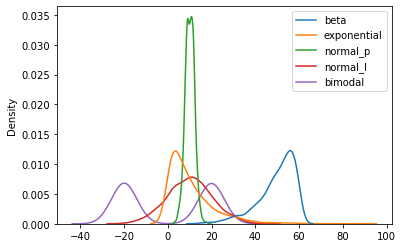

In [8]:
sns.kdeplot(data=df)

In [9]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.849238,10.407608,10.091341,10.109100,0.011365
std,8.474864,10.405661,2.092725,10.195100,20.181780
min,15.078654,0.001718,3.301473,-20.068263,-28.494019
25%,45.856057,2.997872,8.685748,3.109211,-19.910803
50%,52.074304,7.223373,10.136454,10.148924,0.099640
75%,56.308541,14.372531,11.586947,16.728794,20.051856
max,59.993532,87.565059,18.085198,43.678262,28.428869


<AxesSubplot:ylabel='Density'>

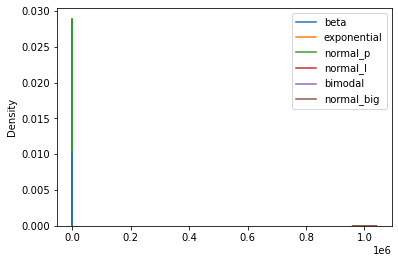

In [10]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

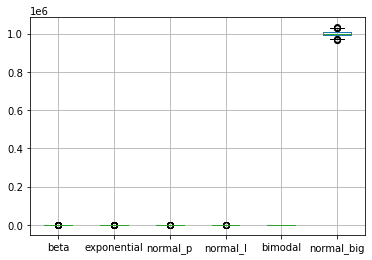

In [11]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [12]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()

In [13]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [14]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.515155,-0.011840,1.476635,0.674080,0.878885,-2.053444
1,-3.169297,0.990673,-0.817482,0.474834,1.063861,-0.897523
2,0.878790,-0.400341,0.919518,-0.555761,1.007315,-0.371415
3,-0.922272,-0.734429,-1.560265,0.749093,1.130561,0.243482
4,0.221420,0.122075,0.625301,0.670012,1.381933,-1.677878


<AxesSubplot:ylabel='Density'>

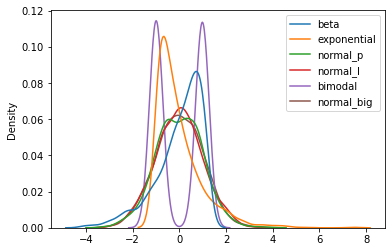

In [15]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [16]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.862777e-17,-6.217249e-18,2.648992e-16,-1.196543e-16,-1.820766e-17,2.313705e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.104843e+00,-1.000522e+00,-3.246133e+00,-2.961468e+00,-1.413138e+00,-3.189394e+00
25%,-4.714152e-01,-7.124433e-01,-6.719924e-01,-6.869370e-01,-9.876302e-01,-6.732249e-01
50%,2.626803e-01,-3.061630e-01,2.156776e-02,3.908174e-03,4.376222e-03,1.277975e-02
75%,7.625532e-01,3.812259e-01,7.150268e-01,6.496264e-01,9.934961e-01,6.961700e-01
max,1.197585e+00,7.418660e+00,3.821742e+00,3.294324e+00,1.408782e+00,3.241601e+00


<AxesSubplot:>

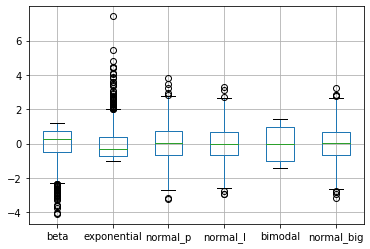

In [17]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()